<a href="https://colab.research.google.com/github/Sumit-Pathrabe/Sql_based_data_extraction/blob/main/Sql_based_data_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sql Based Data Extraction And Joins

In [ ]:
import pandas as pd
# consider this sales_table
sales_data = {
    'sale_id' :[1,2,3,4],
    'customer_id' : [101,102,103,101],
    'item' : ['phone','laptop','phone','tablet'],
    'amount': [30000,60000,30000,15000],
    'profit' : [3000,4000,5000,1500]
}
sales_df=pd.DataFrame(sales_data)
print(sales_data)
print(sales_df)


{'sale_id': [1, 2, 3, 4], 'customer_id': [101, 102, 103, 101], 'item': ['phone', 'laptop', 'phone', 'tablet'], 'amount': [30000, 60000, 30000, 15000], 'profit': [3000, 4000, 5000, 1500]}
   sale_id  customer_id    item  amount  profit
0        1          101   phone   30000    3000
1        2          102  laptop   60000    4000
2        3          103   phone   30000    5000
3        4          101  tablet   15000    1500


In [ ]:
#consider this customers table
customers_data={
    'customer_id' : [101,102,103],
    'customer_name' : ['Akash','Neha','Ramesh'],
    'region': ['North','West','East']
}
customers_df=pd.DataFrame(customers_data)
print('Customers Data')
print(customers_df)

Customers Data
   customer_id customer_name region
0          101         Akash  North
1          102          Neha   West
2          103        Ramesh   East


Perform Inner Join on Dataframe

In [ ]:
merged_df=pd.merge(sales_df,customers_df,on='customer_id',how='inner')

In [ ]:
print('joined_dataframe')
print(merged_df)

joined_dataframe
   sale_id  customer_id    item  amount  profit customer_name region
0        1          101   phone   30000    3000         Akash  North
1        2          102  laptop   60000    4000          Neha   West
2        3          103   phone   30000    5000        Ramesh   East
3        4          101  tablet   15000    1500         Akash  North


Grouping and Aggregation -Total sales and Profit per item


In [ ]:
item_group=sales_df.groupby('item')[['amount','profit']].sum().reset_index()

In [ ]:
print(item_group)

     item  amount  profit
0  laptop   60000    4000
1   phone   60000    8000
2  tablet   15000    1500


filtering Item Having price>4000


In [ ]:
high_profit_item=item_group[item_group['profit']>4000]
print(high_profit_item)

    item  amount  profit
1  phone   60000    8000


In [ ]:
region_sales=merged_df.groupby('region')[['amount']].sum().reset_index()
print(region_sales)

  region  amount
0   East   30000
1  North   45000
2   West   60000


Data Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


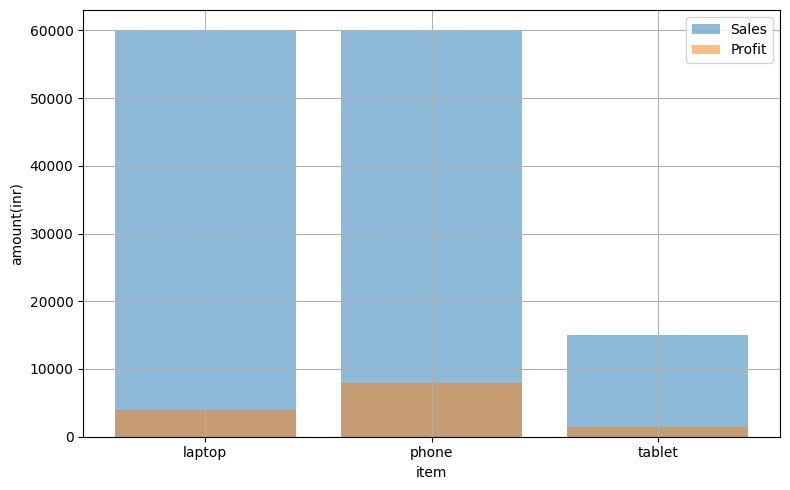

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(item_group['item'],item_group['amount'],label='Sales',alpha=0.5)
plt.bar(item_group['item'],item_group['profit'],label='Profit',alpha=0.5)
plt.xlabel('item')
plt.ylabel('amount(inr)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'sales and profit by item')

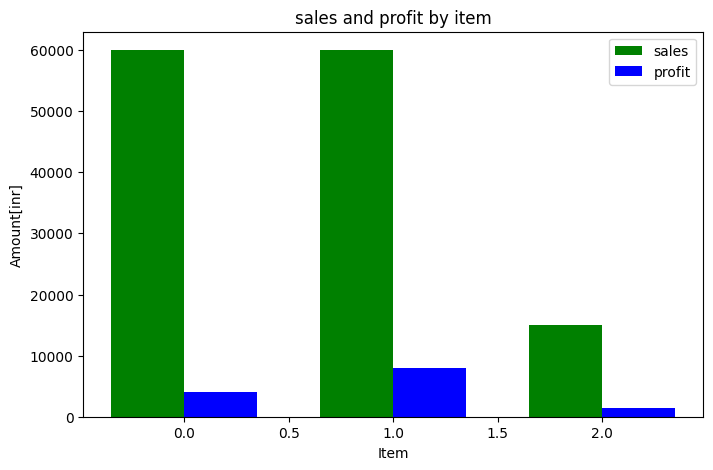

In [ ]:
x=np.arange(len(item_group['item']))
width=0.35
plt.figure(figsize=(8,5))
plt.bar(x-width/2,item_group['amount'],width,label='sales',color='green')
plt.bar(x+width/2,item_group['profit'],width,label='profit',color='blue')
plt.xlabel('Item')
plt.ylabel('Amount[inr]')
plt.legend()
plt.title('sales and profit by item')


region wise sales

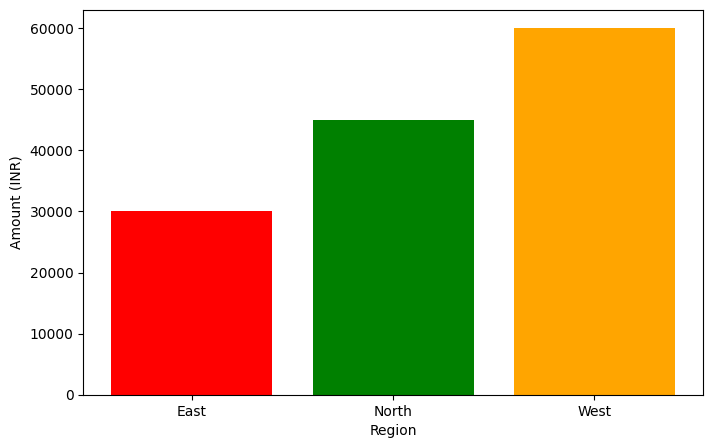

In [ ]:
plt.figure(figsize=(8, 5))

colors = ['red', 'green', 'orange']  # one color per region
plt.bar(region_sales['region'], region_sales['amount'], color=colors)

plt.xlabel('Region')
plt.ylabel('Amount (INR)')
plt.show()

